In [140]:
# Import pandas to manipulate and analyze data
import pandas as pd

In [141]:
# Upload data into the Notebook
df = pd.read_csv("DHL_Facilities.csv")

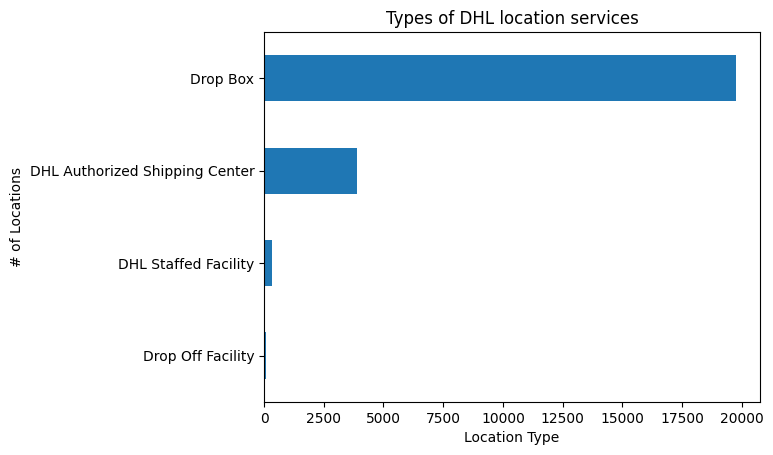

In [142]:
# Import the matplotlib package to visualize the data
import matplotlib.pyplot as plt

# What are the types of DHL Location Services (Drop Box, Staff Facility, etc)
df.groupby('LOCATION_TY').size().sort_values(ascending = True).plot(kind = 'barh')
label = df.groupby('LOCATION_TY').size()
plt.title("Types of DHL location services")
plt.xlabel("Location Type")
plt.ylabel("# of Locations")
plt.show()

In [143]:
df.groupby('PLACEMENT').size().sort_values(ascending = False)

PLACEMENT
Not Available                22594
\nPlacement: Zip Centroid     1469
On Building                      7
On Road                          2
dtype: int64

/var/folders/pw/06zgj8ws5m7f4h_70d5qhskc0000gn/T/ipykernel_6026/2385581641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_placement['PLACEMENT'] = df_placement['PLACEMENT'].str.replace('\\nPlacement: Zip Centroid', 'Zip Centroid')


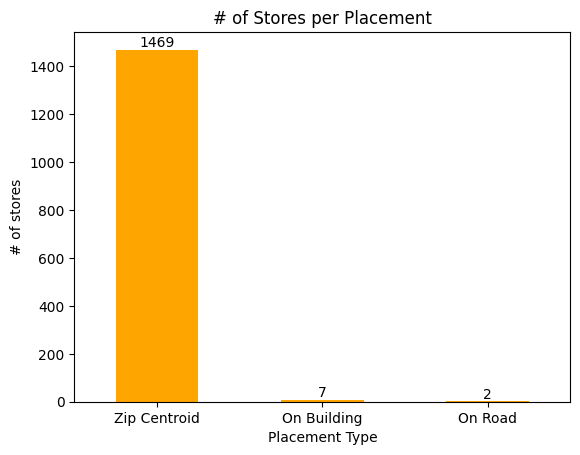

In [144]:
# Investigating the common store placements
df_placement = df[df['PLACEMENT'] != 'Not Available']
df_placement['PLACEMENT'] = df_placement['PLACEMENT'].str.replace('\\nPlacement: Zip Centroid', 'Zip Centroid')

df_grouped = df_placement.groupby('PLACEMENT').size().sort_values(ascending = False)
ax = df_grouped.plot(kind = 'bar', color = 'orange')

for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title("# of Stores per Placement")
plt.xlabel("Placement Type")
plt.ylabel("# of stores", )
plt.xticks(rotation = 0)
plt.show()


In [145]:
df['PLACEMENT'] = df_placement['PLACEMENT'].str.replace('\\nPlacement: Zip Centroid', 'Zip Centroid')


In [146]:
# Cleaning and Splitting 'LAST_PICKUP' into 2 columns
df[["Weekday Timing",'Weekend Timing']] = df['LAST_PICKUP'].str.split(r'\r\n', expand = True)

In [147]:
# Dropping 'LAST_PICKUP' column since it is now cleaned and split into two columns 
df.drop(columns = 'LAST_PICKUP', inplace=True)

In [148]:
# Checking for any duplicate values
df.duplicated().sum()

0

In [149]:
# Checking Column names
df.columns

Index(['X', 'Y', 'OBJECTID', 'FEATURE_ID', 'NAME', 'ADDRESS', 'ADDRESS2',
       'CITY', 'STATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'MATCH_STATUS',
       'PLACEMENT', 'CENSUS_CODE', 'LOCATION_TY', 'LOCATION_TH',
       'Weekday Timing', 'Weekend Timing'],
      dtype='object')

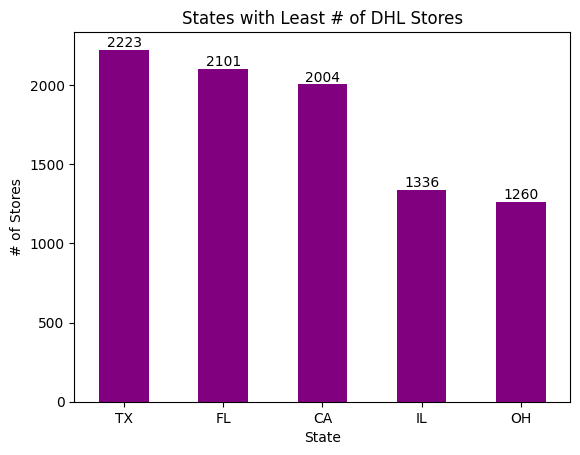

In [150]:
# State with most number of DHL Store
df_grouped = df.groupby('STATE')['NAME'].size().sort_values(ascending = False).head()

ax = df_grouped.plot(kind='bar', color='purple')

# Labeling each bar with its count
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title("States with Least # of DHL Stores")
plt.xlabel("State")
plt.ylabel("# of Stores")
plt.xticks(rotation = 0)
plt.show()

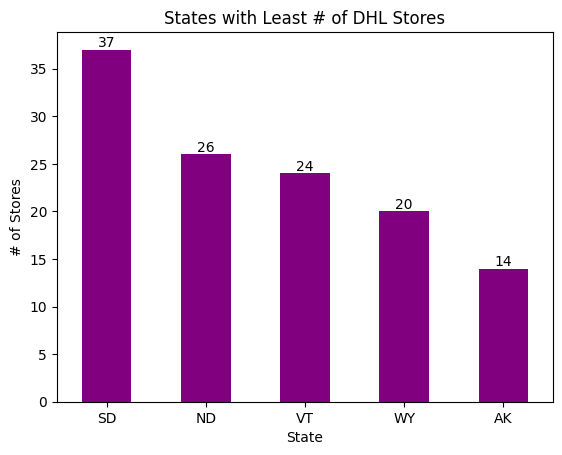

In [151]:
# State with least number of DHL Store
df_grouped = df.groupby('STATE')['NAME'].size().sort_values(ascending = False).tail()
ax = df_grouped.plot(kind='bar', color='purple')

# Labeling each bar with its count
for p in ax.patches:
    ax.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("States with Least # of DHL Stores")
plt.xlabel("State")
plt.ylabel("# of Stores")
plt.xticks(rotation = 0)
plt.show()

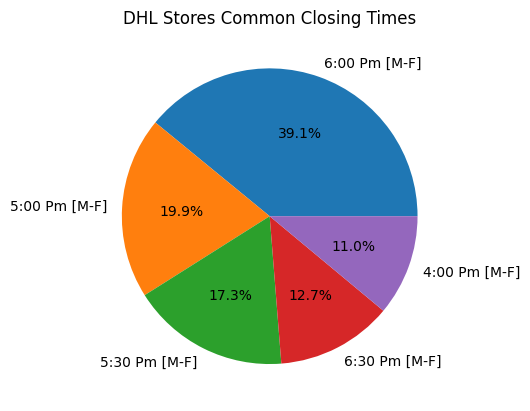

In [152]:
# Last Pickup Common CLosing times
df.groupby('Weekday Timing').size().sort_values(ascending = False).head().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("DHL Stores Common Closing Times")
plt.ylabel("")
plt.show()


In [153]:
df.head()

,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LOCATION_TY,LOCATION_TH,Weekday Timing,Weekend Timing
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,Drop Box,Drop Box and Drop Off Facility,3:00 Pm [M-F],no Sat Pickup
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,NaN,330059711001024,Drop Box,Drop Box and Drop Off Facility,6:30 Pm [M-F],no Sat Pickup
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,NaN,330059713003015,Drop Box,Drop Box and Drop Off Facility,5:00 Pm [M-F],no Sat Pickup
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,NaN,330059714011009,DHL Authorized Shipping Center,DHL Authorized Shipping Center,5:00 Pm [M-F],no Sat Pickup
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,NaN,330199759022015,DHL Authorized Shipping Center,DHL Authorized Shipping Center,3:00 Pm [M-F],12:00 Pm [Sat]


In [154]:
# categorical vs categorical
    # chisquare
    # two way frequency table


In [155]:
# Cross-tabulation
cross_tab = pd.crosstab(df_placement['PLACEMENT'], df_placement['LOCATION_TY'])
print(cross_tab)

LOCATION_TY   DHL Authorized Shipping Center  DHL Staffed Facility  Drop Box  \
PLACEMENT                                                                      
On Building                                0                     0         7   
On Road                                    0                     0         2   
Zip Centroid                             239                    19      1207   

LOCATION_TY   Drop Off Facility  
PLACEMENT                        
On Building                   0  
On Road                       0  
Zip Centroid                  4  


In [156]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
# The categories are independent since the p vslue is greater than 0.05

Chi-Square Statistic: 1.9510251334599262
P-value: 0.9241472189483795


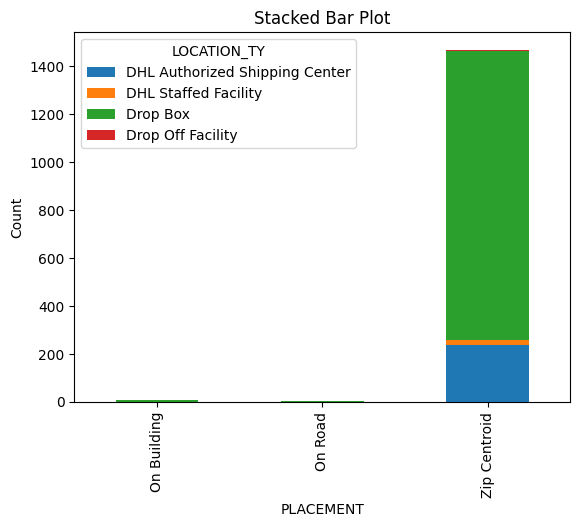

In [157]:
import matplotlib.pyplot as plt

# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Plot")
plt.ylabel('Count')
plt.show()

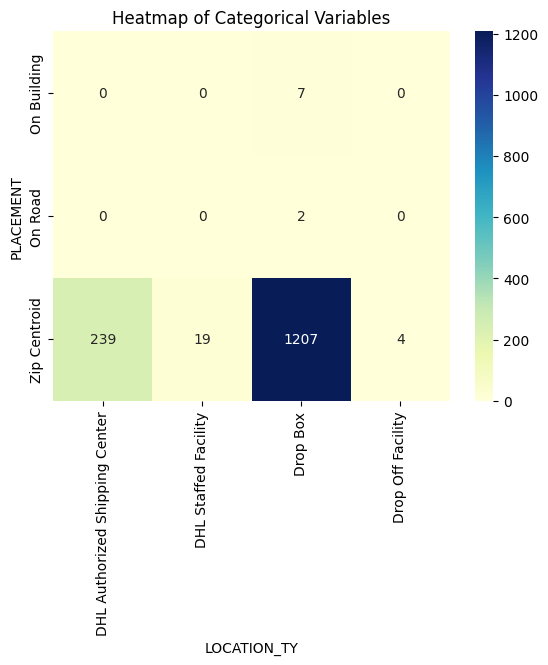

In [158]:
import seaborn as sns

# Heatmap
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Categorical Variables")
plt.show()
